# Binary Classification using different Machine Learning algorithms

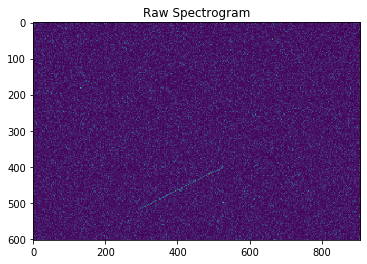

In [565]:
spec = mpimg.imread(r"\Users\Kaustav Dutta\Desktop\spectrogram.png");
plt.imshow(spec),plt.title('Raw Spectrogram')
plt.show()

The Binary Classification will be carried out on the above Project 8 spectrogram. The Classification will be based on the condition that whether a pixel (of a certain intensity) is a signal or noise.

In [31]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.image as mpimg
import pandas
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [101]:
dataset=pandas.read_csv(r"\Users\Kaustav Dutta\Desktop\Pixel-Intensities.csv")  
dataset.head(10)

,Pixel Intensity,Signal/Noise
0,50.588237,1
1,46.666668,1
2,40.784315,1
3,41.764707,1
4,44.509805,1
5,44.313727,1
6,43.921570,1
7,37.254903,0
8,37.843138,0
9,30.784315,0


The threshold for the above spectrogram has been set at 40.

In [63]:
dataset.shape

(2500, 2)

## 1. Logistic Regression on P8 spectrograms

In [64]:
X=dataset[['Pixel Intensity']]
y=dataset[['Signal/Noise']]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=2)
logreg = LogisticRegression()   
probas_ = logreg.fit(X_train, y_train).predict_proba(X_test)

C:\Users\Kaustav Dutta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [66]:
y_pred = logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.909


In [67]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.977404


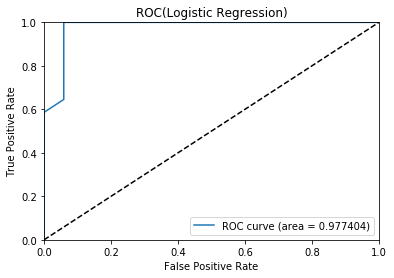

In [68]:
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC(Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

## 2. Decision Trees on P8 spectrograms

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [103]:
clf = DecisionTreeClassifier()

In [104]:
X=dataset[['Pixel Intensity']]
y=dataset[['Signal/Noise']]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0) 
probas_ = clf.fit(X_train, y_train).predict_proba(X_test)

In [106]:
y_pred= clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9755


In [107]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.997788


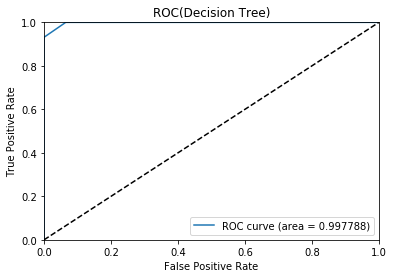

In [108]:
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC(Decision Tree)')
plt.legend(loc="lower right")
plt.show()

## 3. Support Vector Machines on P8 spectrograms

In [109]:
from sklearn.svm import SVC

In [110]:
X=dataset[['Pixel Intensity']]
y=dataset[['Signal/Noise']]

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0) 
classifier = svm.SVC(kernel='linear',probability=True)
probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)

C:\Users\Kaustav Dutta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [112]:
y_pred= classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9585


In [113]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.976211


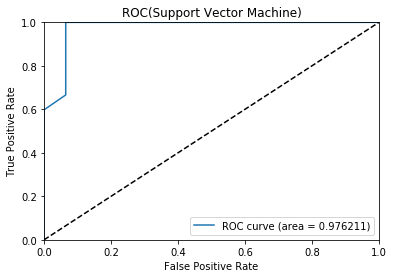

In [114]:
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC(Support Vector Machine)')
plt.legend(loc="lower right")
plt.show()

## 4. KNN Classifier on P8 spectrograms

In [115]:
from sklearn.neighbors import KNeighborsClassifier 

In [116]:
X=dataset[['Pixel Intensity']]
y=dataset[['Signal/Noise']]

In [117]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state=42) 

In [118]:
knn = KNeighborsClassifier(n_neighbors=7) 
probas_=knn.fit(X_train, y_train).predict_proba(X_test)   

C:\Users\Kaustav Dutta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [119]:
y_pred= knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.968


In [120]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.997633


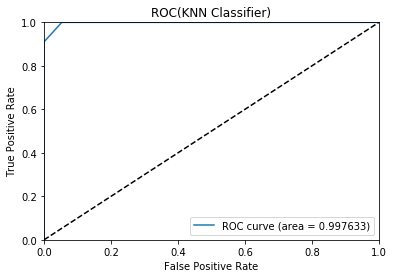

In [121]:
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC(KNN Classifier)')
plt.legend(loc="lower right")
plt.show()

## 5. Gaussian Naive Bayes Classifier on P8 spectrograms

In [89]:
from sklearn.naive_bayes import GaussianNB

In [90]:
gnb = GaussianNB()

In [122]:
X=dataset[['Pixel Intensity']]
y=dataset[['Signal/Noise']]

In [123]:
probas_=gnb.fit(X_train, y_train).predict_proba(X_test)

C:\Users\Kaustav Dutta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [124]:
y_pred= gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.936


In [125]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.978698


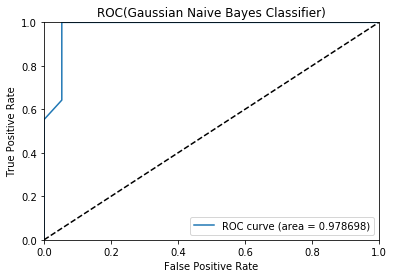

In [126]:
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC(Gaussian Naive Bayes Classifier)')
plt.legend(loc="lower right")
plt.show()

### We thus,list down the ROC curve areas for the 5 classifications. It turns out that Decision Tree classifier emerges as the best model.

In [97]:
dataset=pandas.read_csv(r"\Users\Kaustav Dutta\Desktop\Accuracy.csv")  
dataset.head(5)

,Classifier,Accuracy,AUROC
0,Logistic Regression,0.9090,0.977404
1,Decision Tree,0.9755,0.997788
2,Support Vector Machine,0.9585,0.976211
3,K-Nearest Neighbors,0.9680,0.997633
4,Gaussian Naive Bayes,0.9360,0.978698
